이미지 로데이터 파일에서 데이터 추출

In [2]:
# [1] 파일 입출력 방식
# with open() as ~

file_path='../data/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte'

In [3]:
# 파일 읽을 때 고려사항 => mode = br : 바이트 읽기 모드
with open(file_path, mode='br') as f:
    all_data = f.read()

In [4]:
print(type(all_data), len(all_data))
print(all_data[:100])

<class 'bytes'> 7840016
b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00"


In [5]:
# 파일 읽을 때 고려사항 => mode = br : 바이트 읽기 모드
with open(file_path, mode='br') as f:
    magic_code = f.read(4)
    print(magic_code)
    
    data_length = f.read(4)
    print(data_length)
    
    row = f.read(4)
    print(row)
    
    col = f.read(4)
    print(col)

b'\x00\x00\x08\x03'
b"\x00\x00'\x10"
b'\x00\x00\x00\x1c'
b'\x00\x00\x00\x1c'


In [6]:
# 바이트 ==> 알아보는 문자로
row.hex()

'0000001c'

- [2] 파이썬의 byte 데이터 변환 모듈 struct 활용

In [23]:
### ===> 모듈 로딩
import os, struct

In [8]:
### ===> 데이터 추출 및 저장 관련 변수
### 학습용 : train.csv
### 테스트옹 : test.csv
### 위치 : ../data/text/

data_dir = '../data/text/'
train_file = data_dir+'train.csv'
test_file = data_dir+'test.csv'

In [30]:
### 사용자 정의 함수
### 기능 : raw data 파일을 읽어서 csv 파일로 저장
### 함수명 : to_csv
### 매개변수 : 파일이름, 데이터수
### 반환값 : 파일 생성 여부 True/False

# 디버깅 출력 제어 플래그 변수
DEBUG = 0
def to_csv(name, maxdata):
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open(data_dir+name+'-labels.idx1-ubyte', 'rb')
    img_f = open(data_dir+name+'-images.idx3-ubyte', 'rb')
    
    # csv 파일 생성
    csv_f = open(data_dir+name+'.csv', 'w', encoding='utf-8')
    
    # 헤더 정보 읽기
    mag, lbl_count = struct.unpack('>II', lbl_f.read(8))
    mag, img_count = struct.unpack('>II', img_f.read(8))
    rows, cols = struct.unpack('>II', img_f.read(8))
    pixels = rows * cols
    
    if DEBUG:
        print('lbl_count {}, img_count {}'.format(lbl_count, img_count))
        print('rows {}, cols {}'.format(rows, cols))
        
    for idx in range(lbl_count):
        if idx > maxdata: break
        
        label = struct.unpack('B', lbl_f.read(1))[0]
        if DEBUG: print(' label => {}'.format(label))
        
        # 이미지 데이터 읽기
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n:str(n), bdata))
        if DEBUG: print('sdata => {}'.format(sdata))
        
        # CSV 파일에 쓰기 => 라벨, 데이터1, 데이터2, ..., 데이터784
        csv_f.write(str(label)+',')
        csv_f.write(','.join(sdata) + '\n')
        
    csv_f.close()
    lbl_f.close()
    img_f.close()
    
    # 생성된 파일 존재 여부 확인 후 반환
    return os.path.exists(data_dir+f'{name}.csv')

In [29]:
# 학습용 데이터 파일 생성
to_csv('train', 10000)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



True

In [31]:
# 테스트용 데이터 파일 생성
to_csv('t10k', 1000)

True

- [3] 이미지 데이터 로딩 후 시각화

- [3-1] 이미지 데이터 로딩 csv => DataFrame 또는 Numpy

In [32]:
import pandas as pd
import numpy as np

In [35]:
trainDF = pd.read_csv(data_dir+'train.csv', header=None)
testDF = pd.read_csv(data_dir+'t10k.csv', header=None)

In [36]:
trainDF

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
testDF

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# 이미지 데이터와 라벨 분리
labels = trainDF[0]
img_data = trainDF[trainDF.columns[1:]]
labels.shape, img_data.shape

((10001,), (10001, 784))

- [3-2] 데이터 시각화

In [43]:
import matplotlib.pyplot as plt

In [47]:
# 이미지 데이터
raw_img = img_data.iloc[0].values
type(raw_img), raw_img.shape

(numpy.ndarray, (784,))

In [49]:
# (784,) ===> (28, 28)
raw_img = raw_img.reshape(28, 28)

In [50]:
type(raw_img), raw_img.shape

(numpy.ndarray, (28, 28))

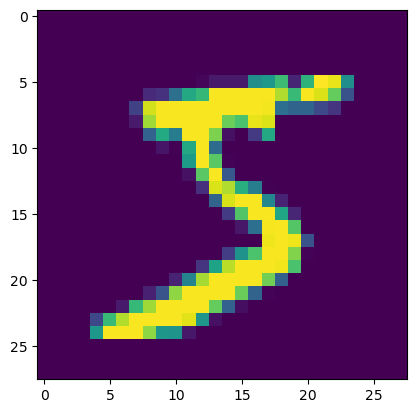

In [51]:
# 시각화
plt.imshow(raw_img)
plt.title(labels.iloc[0])
plt.show()

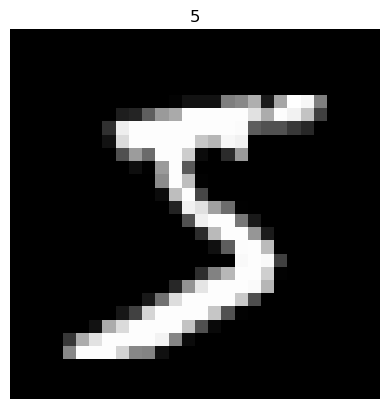

In [56]:
plt.imshow(raw_img, cmap='gray')
plt.title(labels.iloc[0])
plt.axis('off')
plt.show()